# Pymaceuticals Inc.
---
## SCC Tumor Drug Regimen Study 
### Executive Summary

The purpose of this analysis is to provide a high level overview of a study that observes and measures the changes in SCC tumors of 248 mice receiving 1 of 10 drug regimens, including placebo. 

It should be noted that the study included 249 specimens, but 1 specimen was removed from the analysis due to data input error. With the removed specimen data, the sex makeup was an almost evenly split at 50.4% male and 49.6% female. 

At an initial glance, Capomulin and Ramicane have significantly lower mean tumor volumes when compared to all other treatments, as well as the smallest variance in tumor volume. These two treatments also have the most observable timepoints among the treatments. Which may indicate that mice receiving these two treatments survive longer than those receiving the other treatments. 

To better understand the final outcomes of specimens receiving Capomulin and Ramicane drug regimens, we compare them with two other drug regimens that have larger mean tumor values that are similar, Infubinol and Ceframin. 

Comparatively, Capomulin and Ramicane appear to be more effective than Infubinol and Ceframin.  The upper and lower quartile values for tumor volume for animals receiving Capomulin and Ramicane drug regimens are significantly lower than those of Infubinol and Ceframin. Additionally, Capomulin appears to produce the most consistent results with the lowest interquartile range out of the four.

Looking at a mouse that has received the Capomulin drug regimen, we can observe a noticeable decrease in tumor volume over the course of treatment. Mouse ID l509 saw a 7.8% reduction in tumor volume from 45(mm3) to 41.48(mm3) over the course of 45 days. For mice receiving treatment through the Capomulin drug regimen, there is a moderately strong correlation between the specimen’s weight and tumor volume, with a correlation coefficient of 0.84.

In conclusion, initial findings suggest that Capomulin appears to be the most promising drug regimen observed in the study for its ability to produce noticeable and consistent reduction in tumor volume and increased chance of survival over the course of treatment.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])

# Display the data table for preview
study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count = study_complete["Mouse ID"].nunique()
mouse_count

249

In [3]:
# The data should be uniquely identified by Mouse ID and Timepoint...
# Gets the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = study_complete.duplicated(subset=["Mouse ID", "Timepoint"])
mouse_count_dupes = study_complete.copy()
mouse_count_dupes["Duplicate"] = duplicates
mouse_count_dupes = mouse_count_dupes.loc[mouse_count_dupes["Duplicate"] == True, :]
mouse_count_dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
909,g989,Propriva,Female,21,26,0,45.000000,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [4]:
# Gets all the data for the duplicate mouse ID. 
all_dupe_mouse_data = study_complete.loc[study_complete["Mouse ID"] == "g989", :]
all_dupe_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Creates a clean DataFrame by dropping the duplicate mouse by its ID.
study_complete = study_complete[study_complete["Mouse ID"] != "g989"]
study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print(study_complete["Mouse ID"].nunique())

248


## Summary Statistics

In [7]:
# Generates a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Uses groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = study_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor = study_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor = study_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdev_tumor = study_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem_tumor = study_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary_dict = {
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": variance_tumor,
    "Tumor Volume Std. Dev.": stdev_tumor,
    "Tumor Volume Std. Err.": sem_tumor,
}
tumor_summary = pd.DataFrame(tumor_summary_dict)

tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen.
# Using the aggregation method to produce the same summary statistics in a single line

print(study_complete.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']))

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

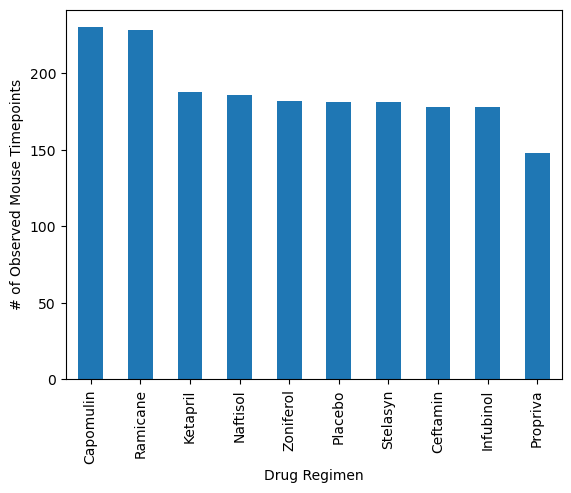

In [9]:
# Generates a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_timepoints = study_complete.groupby(["Drug Regimen"])["Timepoint"].count().sort_values(ascending=False)
regimen_timepoints.plot.bar(xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")

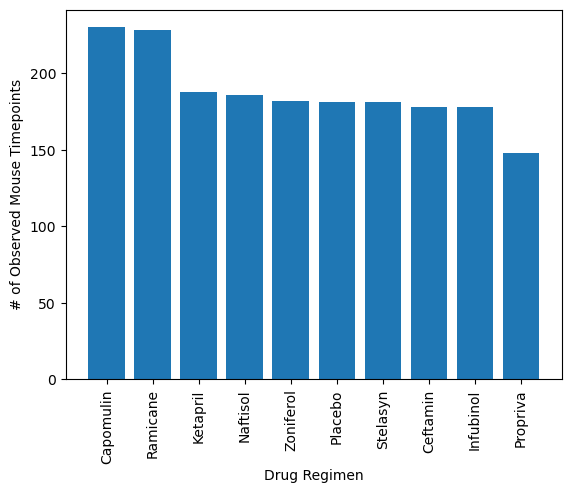

In [10]:
# Coverts series to dataframe and extracts drug name and counts as variables to use in pyplot chart
timepoints_dict = {"# of timepoints": regimen_timepoints}
timepoint_df = pd.DataFrame(timepoints_dict)
timepoint_df = timepoint_df.reset_index()
drug_names = timepoint_df["Drug Regimen"]
timepoint_count = timepoint_df["# of timepoints"]

# Generates a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_names, timepoint_count)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Rotates the tick labels(drug names) to 90 degrees to make them readable
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Sex'>

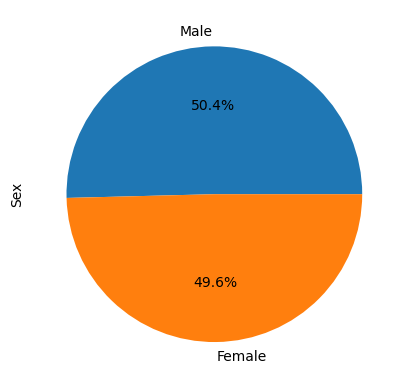

In [11]:
# Generates a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = study_complete.groupby(["Sex"])["Mouse ID"].nunique().sort_values(ascending=False)
mouse_gender.plot.pie(ylabel="Sex", autopct="%1.1f%%")

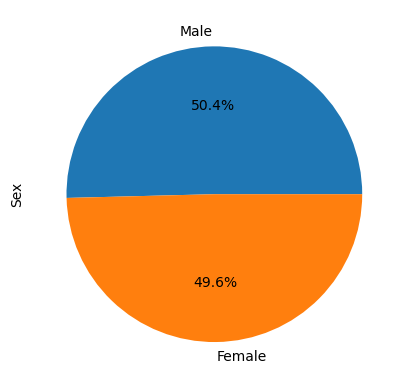

In [12]:
# Coverts series to dataframe and extracts drug name and counts as variables to use in pyplot chart
gender_dict = {"# of mice": mouse_gender}
gender_df = pd.DataFrame(gender_dict)
gender_df = gender_df.reset_index()
mouse_sex = gender_df["Sex"]
sex_number = gender_df["# of mice"]

# Generates a pie plot showing the distribution of female versus male mice using pyplot
colors = ["blue", "orange"]
explode = (0.1, 0, 0, 0)
plt.pie(sex_number, labels=mouse_sex, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [13]:
# Calculates the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Starts by getting the last (greatest) timepoint for each mouse
greatest = study_complete.groupby(["Mouse ID"])["Timepoint"].max().reset_index()
greatest

# Merges this group df with the original DataFrame to get the tumor volume at the last timepoint
compare_max = pd.merge(greatest, study_complete, how="left", on=["Mouse ID", "Timepoint"])
compare_max

# Note: This code was refined with the assistance of DV tutor Kelli Kennedy 

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Puts treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Creates empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# For loop to populate tumor volume data for each treatment regimen and calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    vol = compare_max.loc[compare_max['Drug Regimen'] == x,'Tumor Volume (mm3)']
    
    # adds subset 
    tumor_vol_data.append(vol)
    
    
    # Determines quartiles and IQR
    quart = vol.quantile([.25,.5,.75])
    lquart= quart[.25]
    print(f"The lower quartile for {x}, is {lquart}")
    uquart = quart[.75]
    print(f"The upper quartile for {x}, is {uquart}")
    iqr = uquart - lquart
    print(f"The interquartile range for {x}, is {iqr}")
    # Determines outliers using upper and lower bounds
    ubound = uquart+(iqr*1.5)
    lbound = lquart-(iqr*1.5)
    outliers = vol.loc[(vol > ubound) | (vol < lbound)]
    print(f"{x} outliers include {outliers}")

# Note: This code was created with the assistance of DV tutor Kelli Kennedy 

The lower quartile for Capomulin, is 32.37735684
The upper quartile for Capomulin, is 40.1592203
The interquartile range for Capomulin, is 7.781863460000004
Capomulin outliers include Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile for Ramicane, is 31.56046955
The upper quartile for Ramicane, is 40.65900627
The interquartile range for Ramicane, is 9.098536719999998
Ramicane outliers include Series([], Name: Tumor Volume (mm3), dtype: float64)
The lower quartile for Infubinol, is 54.04860769
The upper quartile for Infubinol, is 65.52574285
The interquartile range for Infubinol, is 11.477135160000003
Infubinol outliers include 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
The lower quartile for Ceftamin, is 48.72207785
The upper quartile for Ceftamin, is 64.29983003
The interquartile range for Ceftamin, is 15.577752179999997
Ceftamin outliers include Series([], Name: Tumor Volume (mm3), dtype: float64)


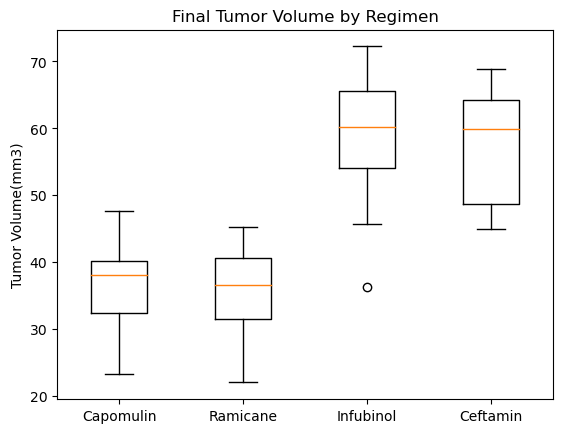

In [15]:
# Generates a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_ylabel('Tumor Volume(mm3)')
ax1.boxplot(tumor_vol_data, labels=treatments)
plt.show()

## Line and Scatter Plots

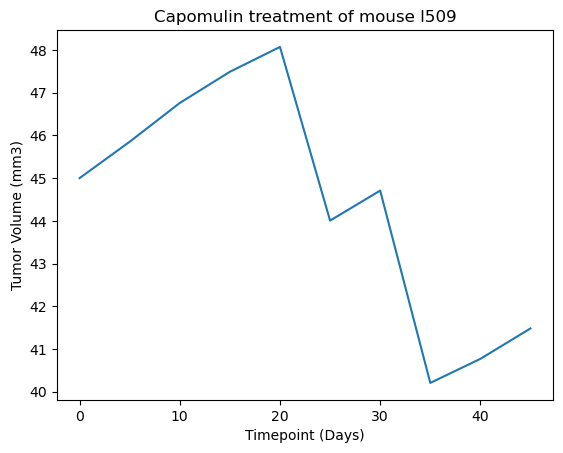

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


In [19]:
# Generates a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = study_complete.loc[study_complete["Mouse ID"] == "l509", :]
plt.plot(mouse_l509["Timepoint"], mouse_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()
mouse_l509

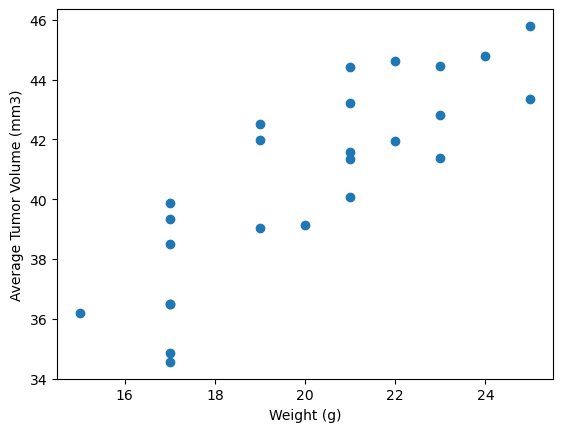

In [17]:
# Generates a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_complete =  study_complete.loc[study_complete["Drug Regimen"] == "Capomulin", :]
capomulin_tumor =  capomulin_complete.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()
plt.scatter(capomulin_tumor.iloc[:,1], capomulin_tumor.iloc[:,2])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


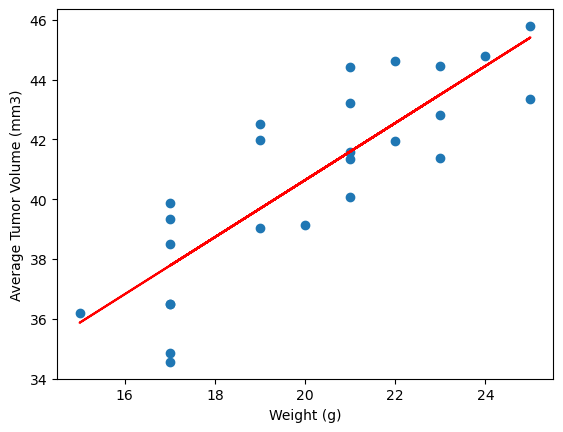

In [18]:
# Calculates the correlation coefficient for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight = capomulin_tumor.iloc[:,1]
tumor = capomulin_tumor.iloc[:,2]
correlation = st.pearsonr(weight, tumor)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

# Generates liner regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

